In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np

In [18]:
n_chunks = 4

In [19]:
chunks = []

for i in range(n_chunks):
    chunks.append(
        (
            dd.read_csv(f'my_data/chunks/X_{i}.csv').drop(['id'], axis=1).compute(),
            dd.read_csv(f'my_data/chunks/y_{i}.csv')['target'].compute()
        )
    )

In [4]:
from sklearn.decomposition import PCA

In [22]:
flatten = []
for i in range(n_chunks):
    pca = PCA(n_components=3)
    flatten.append(pca.fit_transform(chunks[i][0]))

In [26]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [30]:
def plot3d(name, X, y):
    fig = plt.figure()
    fig.set_size_inches(15, 15)
    ax = plt.axes(projection='3d')
    ax.dpi = 1000.0
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
    plt.savefig(f'my_data/{name}.png', format='png')
    plt.show()


def plot_chunks():
    for i in range(n_chunks):
        plot3d(f'chunk {i}', flatten[i], chunks[i][1])

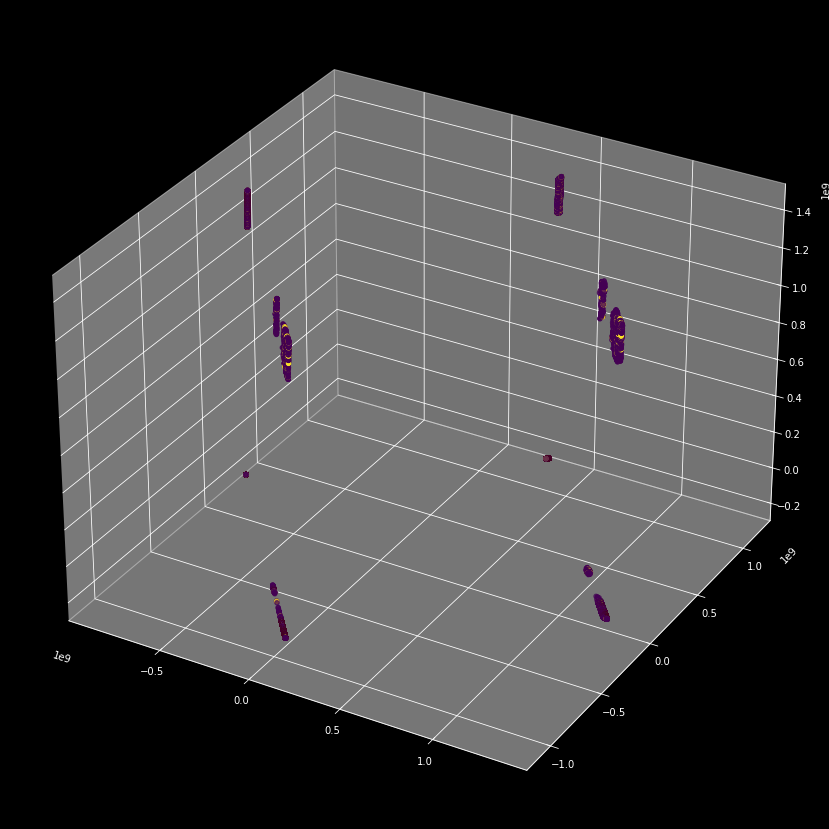

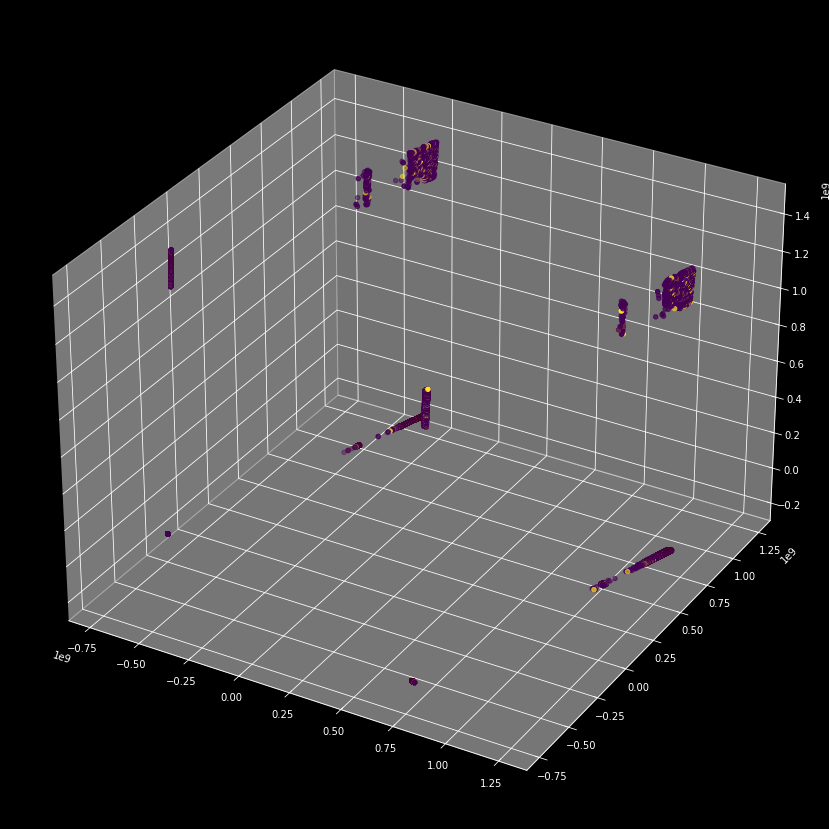

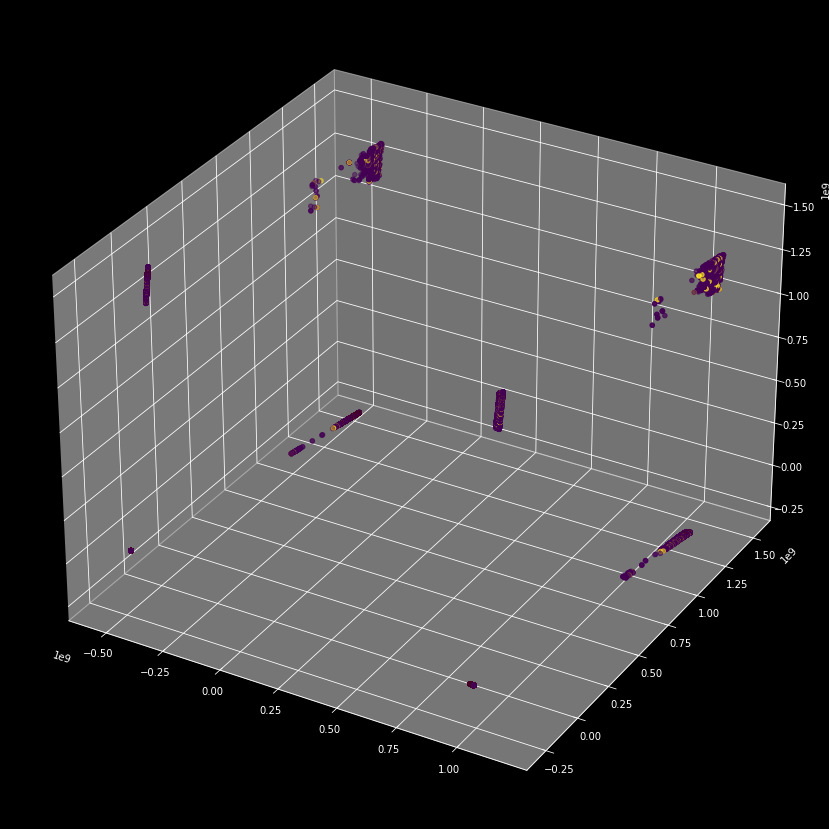

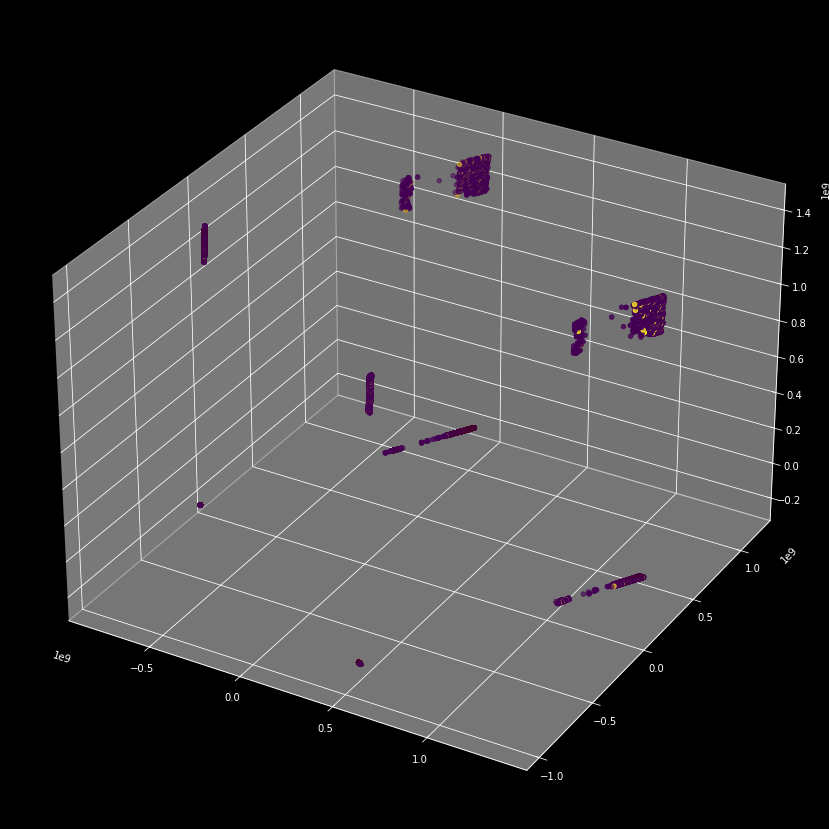

In [31]:
plot_chunks()

Островки на разных данных в разном месте находятся. Значит можно сделать из четырех моделей ансабль, где сильнейшая вероятность побеждает